# TP — Régression avec un Réseau de Neurones Artificiels (ANN) — Version Simplifiée


## Objectifs pédagogiques

- Comprendre le principe de la **régression** avec un réseau de neurones artificiel (ANN).
- Manipuler les bibliothèques `TensorFlow` et `Keras`.
- Construire, entraîner et évaluer un modèle simple.
- Visualiser les résultats.

---


In [ ]:

## 1. Importation des bibliothèques

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris





In [ ]:

## 2. Chargement du jeu de données


iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# housing = fetch_california_housing(as_frame=True)
# df = housing.frame.copy()
# df['MedHouseVal'] = housing.target

# print("Dimensions :", df.shape)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:

## 3. Prétraitement des données
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Forme des données :", X_train_scaled.shape)


Forme des données : (120, 4)


In [ ]:

## 4. Construction du modèle ANN


model = keras.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(3, activation='softmax')  # sortie continue pour la régression
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 739 (2.89 KB)

 Trainable params: 739 (2.89 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

## 5. Entraînement du modèle

history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.2577 - sparse_categorical_accuracy: 0.9128 - val_loss: 0.2873 - val_sparse_categorical_accuracy: 0.8750
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 0.2880 - sparse_categorical_accuracy: 0.8815 - val_loss: 0.2809 - val_sparse_categorical_accuracy: 0.8750
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.2965 - sparse_categorical_accuracy: 0.8776 - val_loss: 0.2736 - val_sparse_categorical_accuracy: 0.8750
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.2891 - sparse_categorical_accuracy: 0.8776 - val_loss: 0.2666 - val_sparse_categorical_accuracy: 0.9167
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2652 - sparse_categorical_accuracy: 0.8737 - val_loss: 0.2612 - val_sparse_categorical_accuracy: 0.9167
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.2670 - sparse_categorical_accuracy: 0.8971 - val_loss: 0.2567 - val_sparse_categorical_accuracy: 0.9167
Epoch 7/100
3/

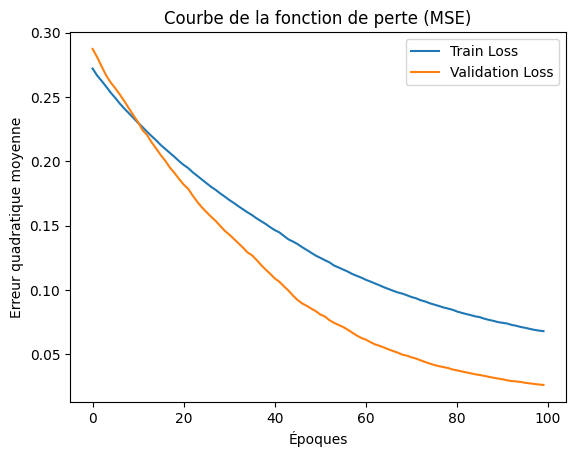

In [ ]:

## 6. Visualisation de l’apprentissage


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Courbe de la fonction de perte (MSE)')
plt.xlabel('Époques')
plt.ylabel('Erreur quadratique moyenne')
plt.legend()
plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
ANN Accuracy: 0.9666666666666667
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



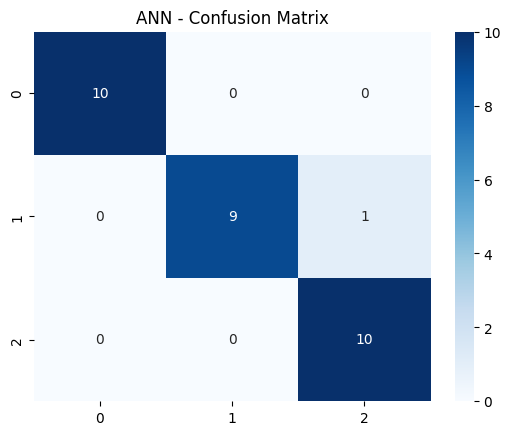

In [ ]:
## 7. Évaluation du modèle

y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

print('ANN Accuracy:', accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('ANN - Confusion Matrix')
plt.show()


## 8. Travaux à faire

1. **Changer l’architecture du réseau** : ajoutez ou supprimez une couche, changez le nombre de neurones.
2. **Modifier la fonction d’activation** : testez `tanh` ou `sigmoid` au lieu de `relu`.
3. **Changer l’optimiseur** : testez `sgd` ou `RMSprop` au lieu de `adam`.
4. **Changer le nombre d’époques ou la taille du batch**.
5. **Analysez les résultats** : quel paramètre influence le plus la performance ?

---
